<p align = center  
<br>
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="center"><br><FONT FACE="times new roman" SIZE=6>
<b>Práctica en Cython</b>
<br>
<i><b>Autor:</b></i> Juan Pablo Barrios Suarez - 8º semestre
<br>
<i><b>Asignatura:</b></i> Computación Paralela y Distribuída
<br>
<i><b>Docente:</b></i> John Corredor
<br>
<i><b>Fecha: </b>8/11/2022
<br>
<b>Ciencias de la computación e inteligencia artificial</b></i>
<br>
</FONT>
</p>


#**Introducción**

Para esta práctica se considera pertinente hablar sobre el lenguaje de programación _Cython_. Este es un lenguaje de programación diseñado para usar la sintaxis de Python y a su vez que pueda implementar métodos y estrategias de programación utilizadas en _C_ y _C++_, por lo que un código realizado en este lenguaje contaría con beneficios de rendimiento como se observan en _C_ y _C++_. 

En otros términos, un programa escrito en este lenguaje contendría la sintaxis de _Python_, solo que, con ciertas correcciones en las declaraciones de variables y funciones, y sería compilado a código de _C_ o _C++_ **[1]**.

#**Objetivo**

Analizar los resultados obtenidos de la ejecución de un programa construido en _Cython_ y _Python_, comparando el rendimiento que ofrece cada uno de los lenguajes de programación mencionados previamente, del cual se espera que _Cython_ ofrezca una mejora en los tiempos de ejecucion debido a la combinación de _Python_ con _C/C++_.

##**Ejercicio:** Medida de rendimiento en Python/Cython para el problema de Planeta en Orbita
Esta práctica consta de la construcción de cinco ficheros de extensión _.pyx_, _.py_ y un archivo de automatización _MakeFile_. A partir de estos ficheros se busca realizar una comparativa del rendimiento que puede ofrecer la ejecución de este programa en el lenguaje de programación _Python_, y como se puede obtener una mejora en el rendimiento al ser implementado en el lenguaje de programación _Cython_. Al final, lo que se obtendra en cada ejecución tanto para _Python_ como para _Cython_, es un fichero _.csv_ que contiene los tiempos de ejecución para los dos lenguajes realizados en una misma iteración. Con base en esos resultados, se realizará una comparativa del programa implementado en ambos lenguajes.

Los archivos que se encuentran dentro del repositorio en GitHub ([Click aqui para acceder](https://github.com/JuanPabloBarrios30/Taller_Cython_CP.git)) son los siguientes: 
>### **orbita_py.py**
>En este programa encontrará la solución propuesta dentro del lenguaje de programación python.

>### **orbita_cy.pyx**
>En este programa encontrará la solución propuesta dentro del lenguaje de programación cython. A nivel de comparación podrá observar que será la misma solución escrita en python, con una pequeña diferencia en la sintáxis.

>### **setup.py**
>El setup es un programa que permite realizar la compilación del archivo `.pyx` a código C. Se divide el setup del código principal para trabajar bajo las buenas prácticas que se aplican con la compilación por separado.

>### **principal.py**
>Este programa realiza la ejecución de los dos programas que contienen la solución. Para esto, este programa escrito en Python implementará ambos programas como bibliotecas y de este modo accede a sus métodos. Posteriormente, toma el tiempo de ejecución para ambos programas por separado, y termina contrastando los rendimientos obtenidos por ambos programas.

>### **Makefile**
>Este programa automatiza el proceso de compilación y creación del recurso compartido del archivo `.pyx`.

#**Resultados**

Para presentar los resultados obtenidos en las pruebas de ejecución, es necesario hacer uso de los módulos de _Pandas_ y _Matplotlib_, ya que estos permitiran visualizar los datos de manera más sencilla.

**1. Se importan los módulos mencionados previamente**

In [29]:
import pandas as pd
import matplotlib.pyplot as plt


**2. Se realiza la lectura del fichero _.csv_ que contiene los datos de las pruebas de ejecución y se genera un DataFrame a partir de este**

In [37]:
url = "/content/drive/MyDrive/Repositorios/Computación Paralela/planeta.csv"
df = pd.read_csv(url, names=['Python', 'Cython'])


**3. Una vez generado el DataFrame, se observan los datos**

In [39]:
df.head(6)


,Python,Cython
0,1.91776,0.11105
1,1.88258,0.11105
2,1.93614,0.11261
3,1.89355,0.11262
4,2.00478,0.11113
5,1.95879,0.11113


**4. Se observar un resumen estadístico de los datos**

In [38]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Python,6.0,1.932267,0.045066,1.88258,1.899603,1.92695,1.953127,2.00478
Cython,6.0,0.111598,0.000788,0.11105,0.111070,0.11113,0.112240,0.11262


**5. Se genera un gráfico de barras para ver el comportamiento del código a través de las iteraciones y como es su rendimiento del programa en cada lenguaje**

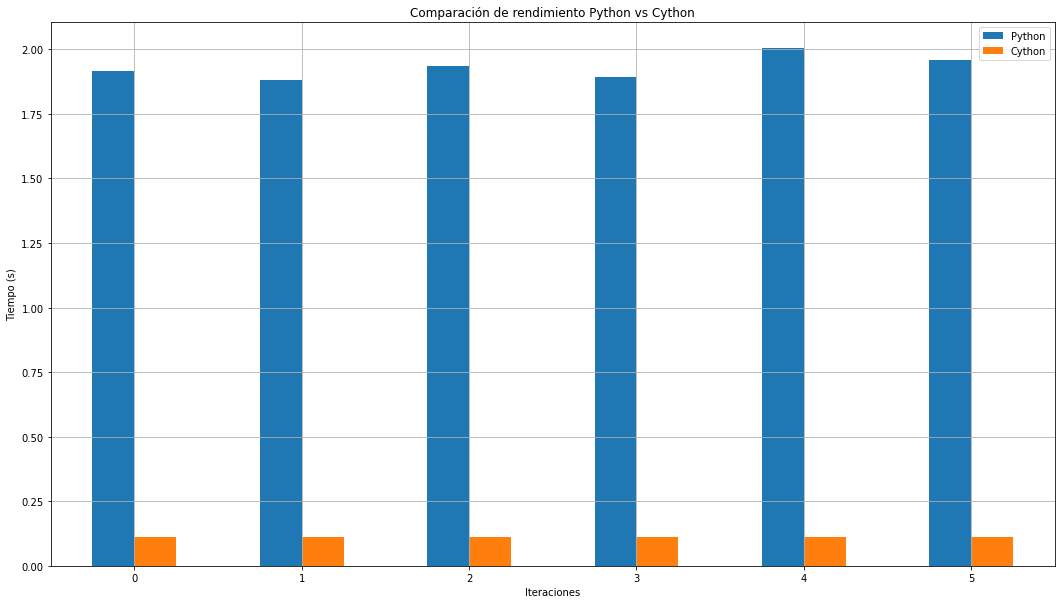

In [32]:
df.plot(kind = 'bar', figsize=(18,10))
plt.ylabel("Tiempo (s)")
plt.xlabel("Iteraciones")
plt.title("Comparación de rendimiento Python vs Cython")
plt.xticks(rotation=0)
plt.grid()
plt.show()


**6. De igual forma, se genera un gráfico de líneas para tener una perspectiva adicional de la comparativa de rendimiento**

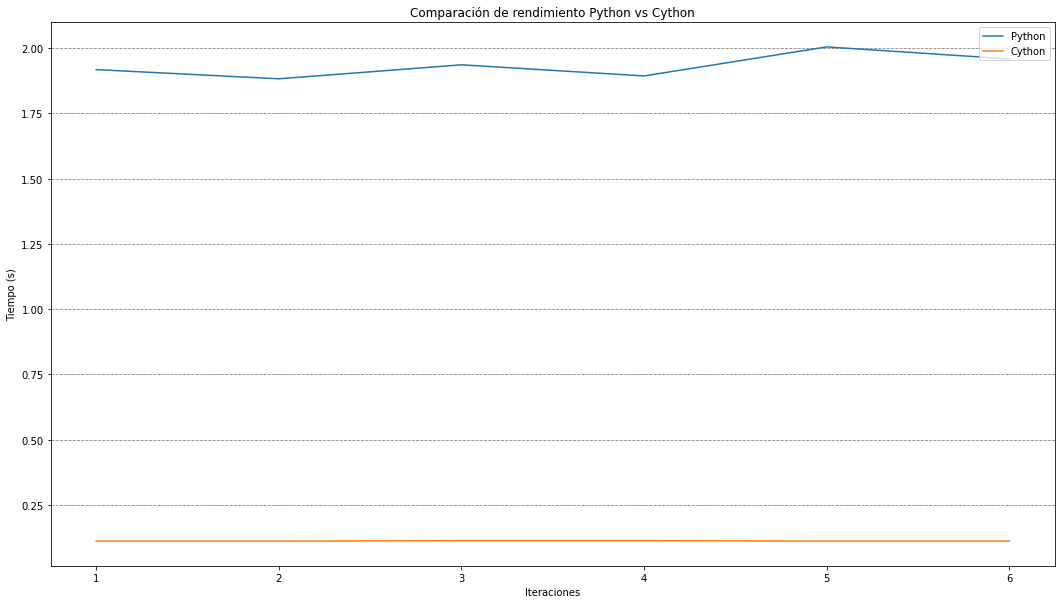

In [33]:
iteraciones = [1, 2, 3, 4, 5, 6]
plt.figure(figsize=(18,10))
plt.plot(iteraciones, df['Python'], label = 'Python')
plt.plot(iteraciones, df['Cython'], label = 'Cython')
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.title("Comparación de rendimiento Python vs Cython")
plt.xlabel("Iteraciones")
plt.ylabel("Tiempo (s)")
plt.legend(loc = 'upper right')
plt.show()


**7. Por último, se puede ver como es el comportamiento individual de los dos lenguajes para este programa**

Text(0.5, 1.0, 'Cython Execution Time')

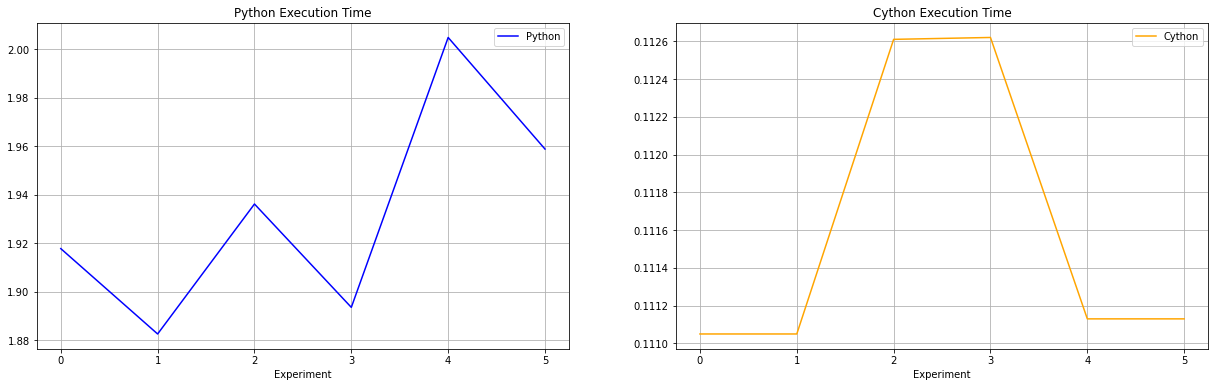

In [41]:
plt.figure(figsize=(21, 6))

plt.subplot(1, 2, 1)
plt.plot(df['Python'], color='blue', label='Python')
plt.legend()
plt.xlabel('Time')
plt.xlabel('Experiment')
plt.grid()
plt.title('Python Execution Time')


plt.subplot(1, 2, 2)
plt.plot(df['Cython'], color='orange', label='Cython')
plt.legend()
plt.xlabel('Time')
plt.xlabel('Experiment')
plt.grid()
plt.title('Cython Execution Time')


#**Conclusiones**

## De la práctica, se puede concluir lo siguiente:
> 1. El lenguaje de programación _Cython_, a pesar de ser similar a _Python_, puede llegar a ofrecer un mejor rendimiento con respecto a la ejecución de determinado programa debido a que este permite la utilización de módulos y variables del lenguaje de programación _C_.

> 2. Se crea un repositorio que contiene los ficheros necesarios para que cualquier usuario que desee replicar esta práctica pueda hacerlo de manera rápida y sencilla. De igual forma, en el repositorio se encuentran las instrucciones necesarias para conseguir la ejecución del programa

> 3. Del gráfico de barras se pudo observar que hay una mejora considerable en los tiempos de ejecución en el lenguaje de programación _Cython_ con respecto a _Python_. En _Python_ se obtuvo un promedio de $1.93$s, mientras que en _Cython_ se obtuvo un promedio de $0.11$s, lo cual indica que Cython es aproximadamente $17$ veces mejor que Python para la ejecución de este programa

> 4. Del gráfico de lineas en el que se comparó _Python_ con respecto a _Cython_, se puede observar que la escala en la que se encuentran los tiempos de ambos programas, genera que la curva de _Cython_ se vea como una línea recta, mientras que en la de _Python_ si se pueden observar unas pequeñas fluctuaciones en los tiempos. Es por ello que se realiza la gráfica individual para cada lenguaje, lo cual permite apreciar de mejor manera los tiempos de ejecucíon. Para _Python_ se puede observar una fluctuación mayor en los tiempos, oscilando entre $1.88$s y $2.00$, mientras que en _Cython_ se ve un comportamiento extraño, ya que en cierto tramo de la curva se comporta de manera constante, sin embargo sigue fluctuando a medida que avanzan las iteraciones. Esto se debe a que el nodo computacional no se aisló al momento de realizar las pruebas, por lo que los datos pudieron haberse contaminado.

> 5. Con base en lo mencionado anteriormente, se recomienda que si se quiere replicar este experimento, en lo posible se aísle el nodo computacional que vaya a realizar la correspondiente ejecución, con el fin de obtener una mejor calidad en los resultados y asi poder realizar un análisis más completo, que muestre el comportamiento real de los dos lenguajes.

> 6. Por último, se recomienda que, como se está trabajando con _Cython_, y este a su vez tiene acceso a los módulos y variables del lenguaje de programación _C_, a través de la instrucción `nogil` se pueda dar ese acceso al uso de _OpenMP_ para introducir el paralelismo y poder obtener una mejora en los tiempos de ejecución.

#**Referencias**

[1] "Optimizando al máximo Python con Cython". INLOC Robotics. https://inlocrobotics.com/es/optimizando-python-con-cython/ (accedido el 8 de noviembre de 2022).